In [1]:
import libsequence
import sys
import pandas as pd
import math
import argparse
import vcf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<H2>Plot Figure 1</H2>

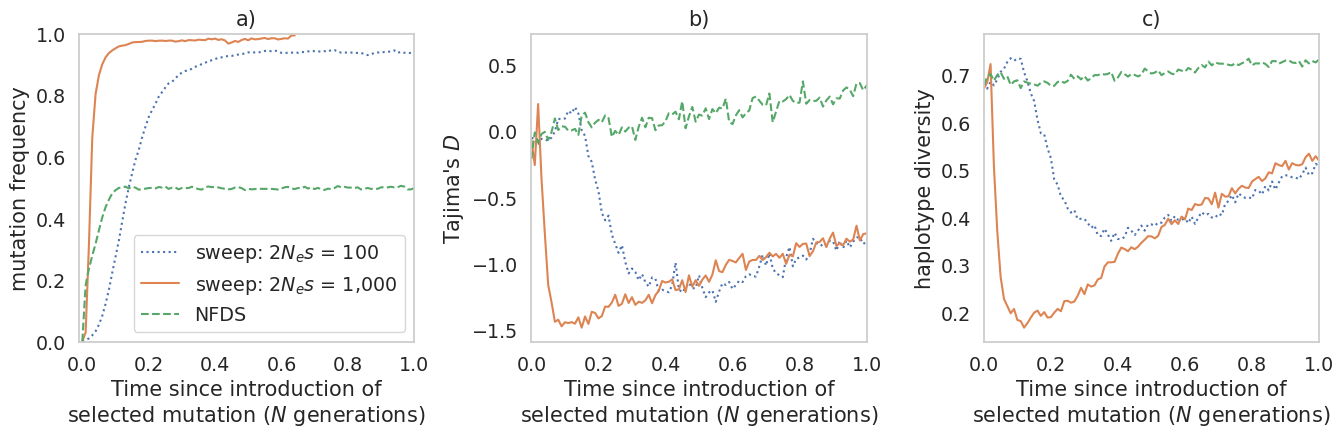

In [2]:
lst = []
for Nes in [100, 1000]:
    rdf = pd.DataFrame()
    for i in range(1, 101):
        df = pd.read_csv(r"/home/vivak/nfds/scripts/sweeps/" + str(Nes) + "_rep"+str(i)+".bs", sep=' ', 
                         names=["out", "gen", "cycle", "x1", "pop", "id", "mut_type", "x2", "s", "x3", "x4", "intro_gen", "AC"])
        df['gen_N'] = (df.gen - 5000) / 500
        df['AF'] = df.AC / 1000
        df['rep'] = i
        rdf = pd.concat([rdf, df])

    df10 = pd.DataFrame(rdf.groupby('gen_N')['AF'].mean())
    df10['gen'] = df10.index
    df10 = df10.reset_index(drop=True)
    lst.append(df10)
    
    
lst2 = []
for Feq in [0.5]:
    rdf = pd.DataFrame()
    for i in range(1, 101):
        df = pd.read_csv(r"/home/vivak/nfds/scripts/bs/" + str(Feq) + "_rep"+str(i)+".bs", sep=' ', 
                         names=["out", "gen", "cycle", "x1", "pop", "id", "mut_type", "x2", "s", "x3", "x4", "intro_gen", "AC"])
        df['gen_N'] = (df.gen - 5000) / 500
        df['AF'] = df.AC / 1000
        df['rep'] = i
        rdf = pd.concat([rdf, df])

    df10 = pd.DataFrame(rdf.groupby('gen_N')['AF'].mean())
    df10['gen'] = df10.index
    df10 = df10.reset_index(drop=True)
    lst2.append(df10)

sns.set(rc={'figure.figsize':(16,4),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
plt.subplot(1,3,1)

plt.plot(lst[0].gen, lst[0].AF, label= r'sweep: 2$N_es$ = 100', linestyle=':')
plt.plot(lst[1].gen, lst[1].AF, label= r'sweep: 2$N_es$ = 1,000')
plt.plot(lst2[0].gen, lst2[0].AF, linestyle='--', label= 'NFDS')
plt.title('a)')
plt.xlim([-0.01,1])
plt.ylim([0,1])
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.xlabel(r'Time since introduction of' + "\n" + 'selected mutation ($N$ generations)')
plt.ylabel('mutation frequency')
plt.legend()
labs = [r"Tajima's $D$", r"haplotype diversity"]
titles = ['b)', 'c)']
for i, stat in enumerate(['tajimasd', 'hapdiv']):
    plt.subplot(1,3,i+2)
    sdf1=pd.read_csv(r"/home/vivak/nfds/scripts/sweeps/"+stat+"_" + str(100) + ".txt", sep='\t', header=0)
    sdf2=pd.read_csv(r"/home/vivak/nfds/scripts/sweeps/"+stat+"_" + str(1000) + ".txt", sep='\t', header=0)
    bdf=pd.read_csv(r"/home/vivak/nfds/scripts/bs2/"+stat+".txt", sep='\t', header=0)
    
    plt.plot([t/500 for t in range(0,1005, 5)], sdf1['10'], label=r'sweep: 2$N_es$ = 100', linestyle=':')
    plt.plot([t/500 for t in range(0,1005, 5)], sdf2['10'], label=r'sweep: 2$N_es$ = 1,000')
    plt.plot([t/500 for t in range(0,1005, 5)], bdf['10'], label='NFDS', linestyle='--')
    plt.xlim([0, 1])
    #plt.legend()
    plt.xlabel(r'Time since introduction of' + "\n" + 'selected mutation ($N$ generations)')
    plt.ylabel(labs[i])
    plt.title(titles[i])
plt.subplots_adjust(wspace=0.35, hspace=0.45)
#plt.savefig('/home/vivak/nfds/plots/fig1.png', format='png', bbox_inches='tight')

<h2>Plot Figure 2</h2>

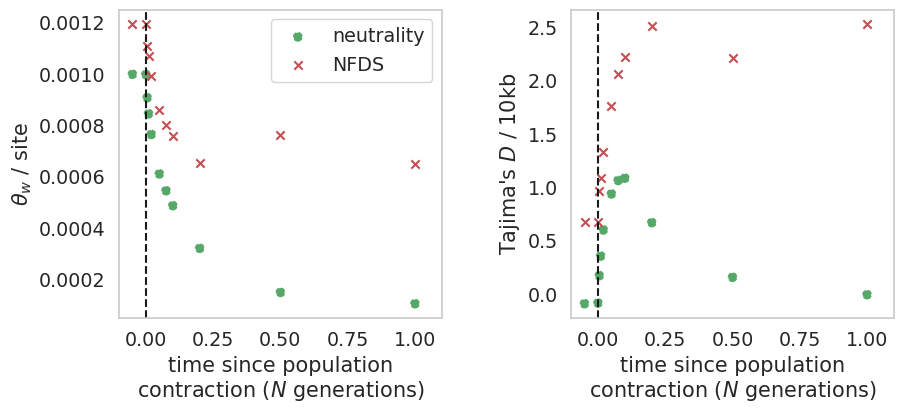

In [3]:
sns.set(rc={'figure.figsize':(10, 4),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)

ylabs = [r'$\theta_w$ / site', r"Tajima's $D$ / 10kb"]
#n0.1 n0.05 0 0.005 0.01 0.02 0.05 0.075 0.1 0.2 0.5 1 1.195
d = {'n0.05':-0.05, '0': 0, '0.005':0.005, '0.01':0.01, '0.02':0.02, '0.05':0.05, '0.075':0.075, '0.1':0.1, '0.2':0.2, '0.5':0.5, '1':1}
for x, stat in enumerate(['thetaw', 'tajimasd']):
    plt.subplot(1,2,x+1)
    n = []
    n2 = []
    bs = []
    bs2 = []
    for key, value in d.items():
        rdf1 = pd.DataFrame()
        rdf2 = pd.DataFrame()
        for rep in range(1, 101):
            try:
                f = pd.read_csv(r"/home/vivak/nfds/contraction/neutral/" + str(key) + "N_rep" + str(rep) + ".stats", sep='\t', header=0)
                f['thetaw'] = f.thetaw / 10000
                rdf1 = pd.concat([rdf1,f])
            except Exception:
                pass
    
            try:
                f = pd.read_csv(r"/home/vivak/nfds/contraction/bs/" + str(key) + "N_rep" + str(rep) + ".stats", sep='\t', header=0)
                f['thetaw'] = f.thetaw / 10000
                rdf2 = pd.concat([rdf2,f])
            except Exception:
                pass
            
        n.append(np.mean(rdf1[stat]))
        bs.append(np.mean(rdf2[stat]))
        n2.append(np.std(rdf1[stat]))
        bs2.append(np.std(rdf2[stat]))

    plt.axvline(0, color='k', linestyle='--')
    plt.scatter(d.values(), n, linestyle='--', c='g', label='neutrality')

    plt.scatter(d.values(), bs, marker='x', c='r', label='NFDS')
    plt.ylabel(ylabs[x])
    plt.xlabel(r'time since population' + '\n' + 'contraction ($N$ generations)')
    plt.xlim([-0.1, 1.1])
    if(x==0):
        plt.legend()
plt.subplots_adjust(wspace=0.4, hspace=0.45)
#plt.savefig('/home/vivak/nfds/plots/fig2.png', format='png', bbox_inches='tight')

<h2>Plot Figure 3</h2>

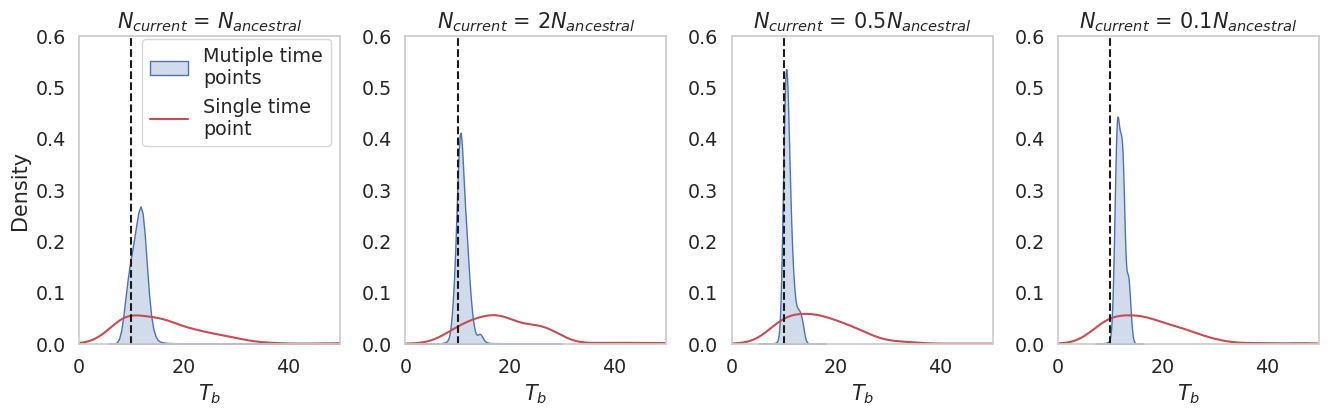

In [4]:
l = [1,3,5,7]
titles = [r"$N_{current}$ = $N_{ancestral}$", r"$N_{current}$ = 2$N_{ancestral}$", r"$N_{current}$ = 0.5$N_{ancestral}$", r"$N_{current}$ = 0.1$N_{ancestral}$"]
sns.set(rc={'figure.figsize':(16,4),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
for d,demog in enumerate(['eq', 'expansion', 'contraction', 'severe_contraction']):
    df1 = pd.read_csv(r"/home/vivak/nfds/posteriors/nnet/" + demog + ".txt", sep='\t', header=0)
    df2 = pd.read_csv(r"/home/vivak/nfds/posteriors/nnet/" + demog + "_st.txt", sep='\t', header=0)
    #df1['Feq'] = np.where(df1.Feq>0.5, 1-df1.Feq, df1.Feq)
    #df2['Feq'] = np.where(df2.Feq>0.5, 1-df2.Feq, df2.Feq)
    plt.subplot(1,4,d+1)
    sns.kdeplot(np.array(df1['Tb']), fill=True, bw_method=0.4, label='Mutiple time\npoints')
    sns.kdeplot(np.array(df2['Tb']), fill=False, bw_method=0.4, c='r', label='Single time\npoint')
    plt.axvline(x=10, c='k', linestyle='--')
    plt.xlim([0, 50])
    plt.ylim([0, 0.6])
    plt.xlabel(r'$T_{b}$')
    if(d==0):
        plt.legend(bbox_to_anchor=(1, 1.02))
    else:
        plt.ylabel('')
    plt.title(titles[d])

plt.subplots_adjust(wspace=0.25, hspace=0.5)
#plt.savefig('/home/vivak/nfds/plots/fig3.png', format='png', bbox_inches='tight')